# IDR2 Delay Filtered Data - Delay Wedge Plotting

### Tyler Cox

In this notebook, delay spectra from LST binned IDR2.1 (generated in delay_wedge_analysis.ipynb) are sorted and plotted by baseline length and compared to delay spectra from delay filtered data produced from the same IDR2.1 LST binned data. This notebook has been made to investigate why a video produced from imaged delay filtered data is still showing foreground dependence when the delay filtering should have removed all foregrounds. We can start by importing plotting libraries and entering plotting settings.

In [1]:
% matplotlib notebook 

import numpy as np # Used to read in delay spectra
from pyuvdata import UVData # Reads in time delays
import matplotlib.pyplot as plt # Plotting
from matplotlib.colors import SymLogNorm # Set log scale for color plots

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

Now that the libraries are loaded, we can pull out the time delay values for plotting. For now, the time delays from one time integration are being used even though 40 different time integrations were used. Since every time integration should have the same frequency array and number of frequencies it shouldn't be a problem that I am only using one file to find the time delays for all the delay spectra, but I might look into this later.

In [2]:
uv = UVData()
uv.read_miriad('/data6/HERA/data/IDR2.1/LSTBIN/zen.grp1.of1.xx.LST.1.10036.uvOCRSL/')
freq_width = np.diff(uv.freq_array[0,:])[0]/1e9
delays = np.fft.fftshift(np.fft.fftfreq(uv.Nfreqs,freq_width))

antenna_diameters is not set. Using known values for HERA.


This is where the process gets a little hacky. When the delay spectra were generated for each baseline, it was noticed that the baselines that should be the same length were slightly off of where they should have been. For example, the shortest baseline, which should be ~14.6 m, was instead 14.6045 m in one pair of antennas and 14.6046 m in another. This is likely due to the fact that in the real world antenna will not always be perfectly placed and that causes slight variation in the shorted baseline length. 

To solve this, the baseline lengths are rounded to limit the number of unique baselines in the final plot. The indicies of baselines with one length are found and their delay spectra averaged and added to new array for sorting.

In [3]:
delay_spec_nf = np.load('time_avg_baselines_nf.npy')
baseline_len_nf = np.load('baseline_length_arr_nf.npy')

idx = np.argsort(baseline_len_nf[:2070])
wedge_nf = delay_spec_nf[idx]

baseline_len_round_nf = baseline_len_nf[:2070]
baseline_len_round_nf.sort()

In [4]:
'''precision = 3

delay_spec_nf = np.load('time_avg_baselines_nf.npy')
baseline_len_nf = np.load('baseline_length_arr_nf.npy')

baseline_len_round_nf = np.unique(np.array(baseline_len_nf)[:2070].round(precision))
baseline_len_round_nf.sort()

rounded = np.array(baseline_len_nf)[:2070].round(precision)

wedge_nf = []

for i in baseline_len_round_nf:
    wedge_nf.append(np.mean(delay_spec_nf[np.where(rounded == i)],axis=0))

wedge_nf = np.array(wedge_nf)
'''

"precision = 3\n\ndelay_spec_nf = np.load('time_avg_baselines_nf.npy')\nbaseline_len_nf = np.load('baseline_length_arr_nf.npy')\n\nbaseline_len_round_nf = np.unique(np.array(baseline_len_nf)[:2070].round(precision))\nbaseline_len_round_nf.sort()\n\nrounded = np.array(baseline_len_nf)[:2070].round(precision)\n\nwedge_nf = []\n\nfor i in baseline_len_round_nf:\n    wedge_nf.append(np.mean(delay_spec_nf[np.where(rounded == i)],axis=0))\n\nwedge_nf = np.array(wedge_nf)\n"

<IPython.core.display.Javascript object>


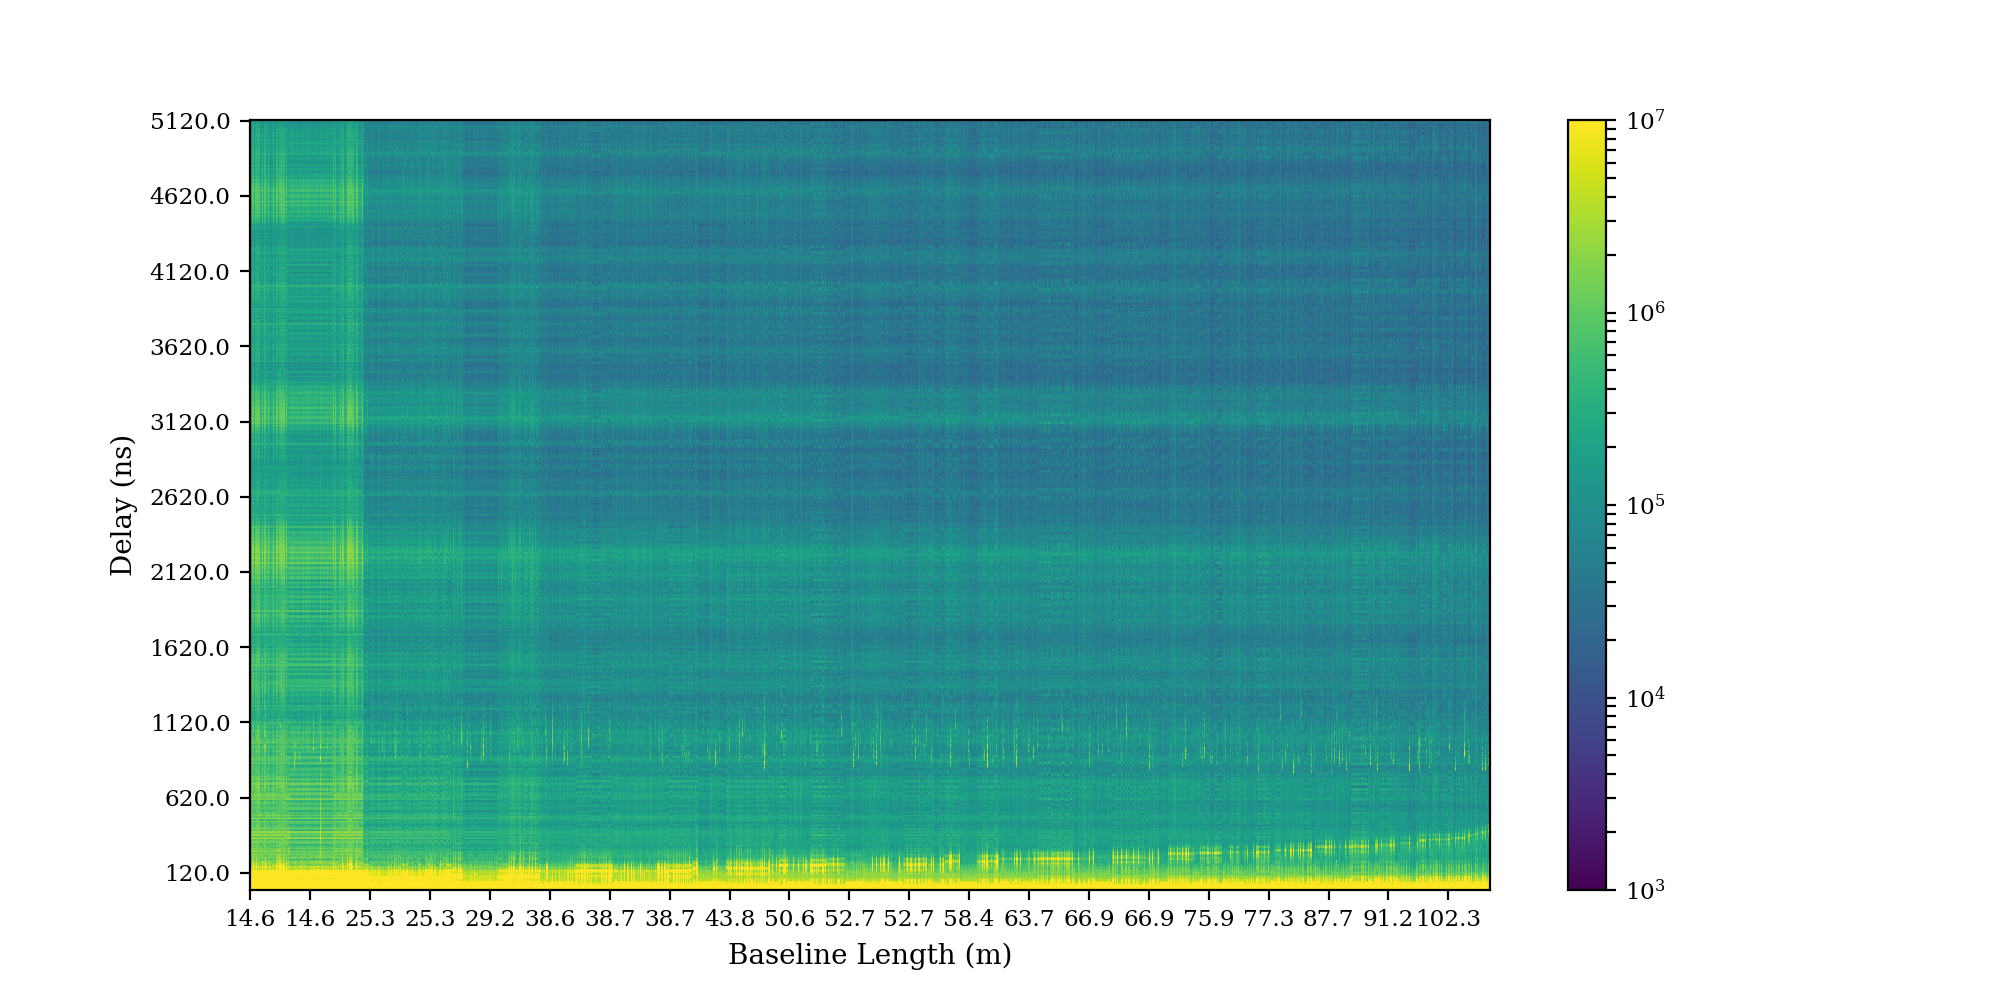

In [5]:
plt.figure(figsize=(10,5))
plt.imshow(wedge_nf.T[:512,],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1))
plt.xticks(np.arange(0,baseline_len_round_nf.shape[0],100),baseline_len_round_nf[::100].round(1))
plt.xlabel('Baseline Length (m)')
plt.yticks(np.arange(0,delays[:512].shape[0],50),np.abs(delays)[:512][::50])
plt.ylabel('Delay (ns)')
plt.colorbar()

In [6]:
time_avg_baselines = np.load('time_avg_baselines.npy')
baseline_arr = np.load('baseline_length_arr.npy')

idx = np.argsort(baseline_arr[:2070])
wedge = time_avg_baselines[idx]

In [7]:
'''
precision = 3

time_avg_baselines = np.load('time_avg_baselines.npy')
baseline_arr = np.load('baseline_length_arr.npy')

baseline_round = np.unique(np.array(baseline_arr)[:2070].round(precision))
baseline_round.sort()

rounded = np.array(baseline_arr)[:2070].round(precision)

wedge = []

for i in baseline_round:
    wedge.append(np.mean(time_avg_baselines[np.where(rounded == i)],axis=0))

wedge = np.array(wedge)
'''

"\nprecision = 3\n\ntime_avg_baselines = np.load('time_avg_baselines.npy')\nbaseline_arr = np.load('baseline_length_arr.npy')\n\nbaseline_round = np.unique(np.array(baseline_arr)[:2070].round(precision))\nbaseline_round.sort()\n\nrounded = np.array(baseline_arr)[:2070].round(precision)\n\nwedge = []\n\nfor i in baseline_round:\n    wedge.append(np.mean(time_avg_baselines[np.where(rounded == i)],axis=0))\n\nwedge = np.array(wedge)\n"

<IPython.core.display.Javascript object>


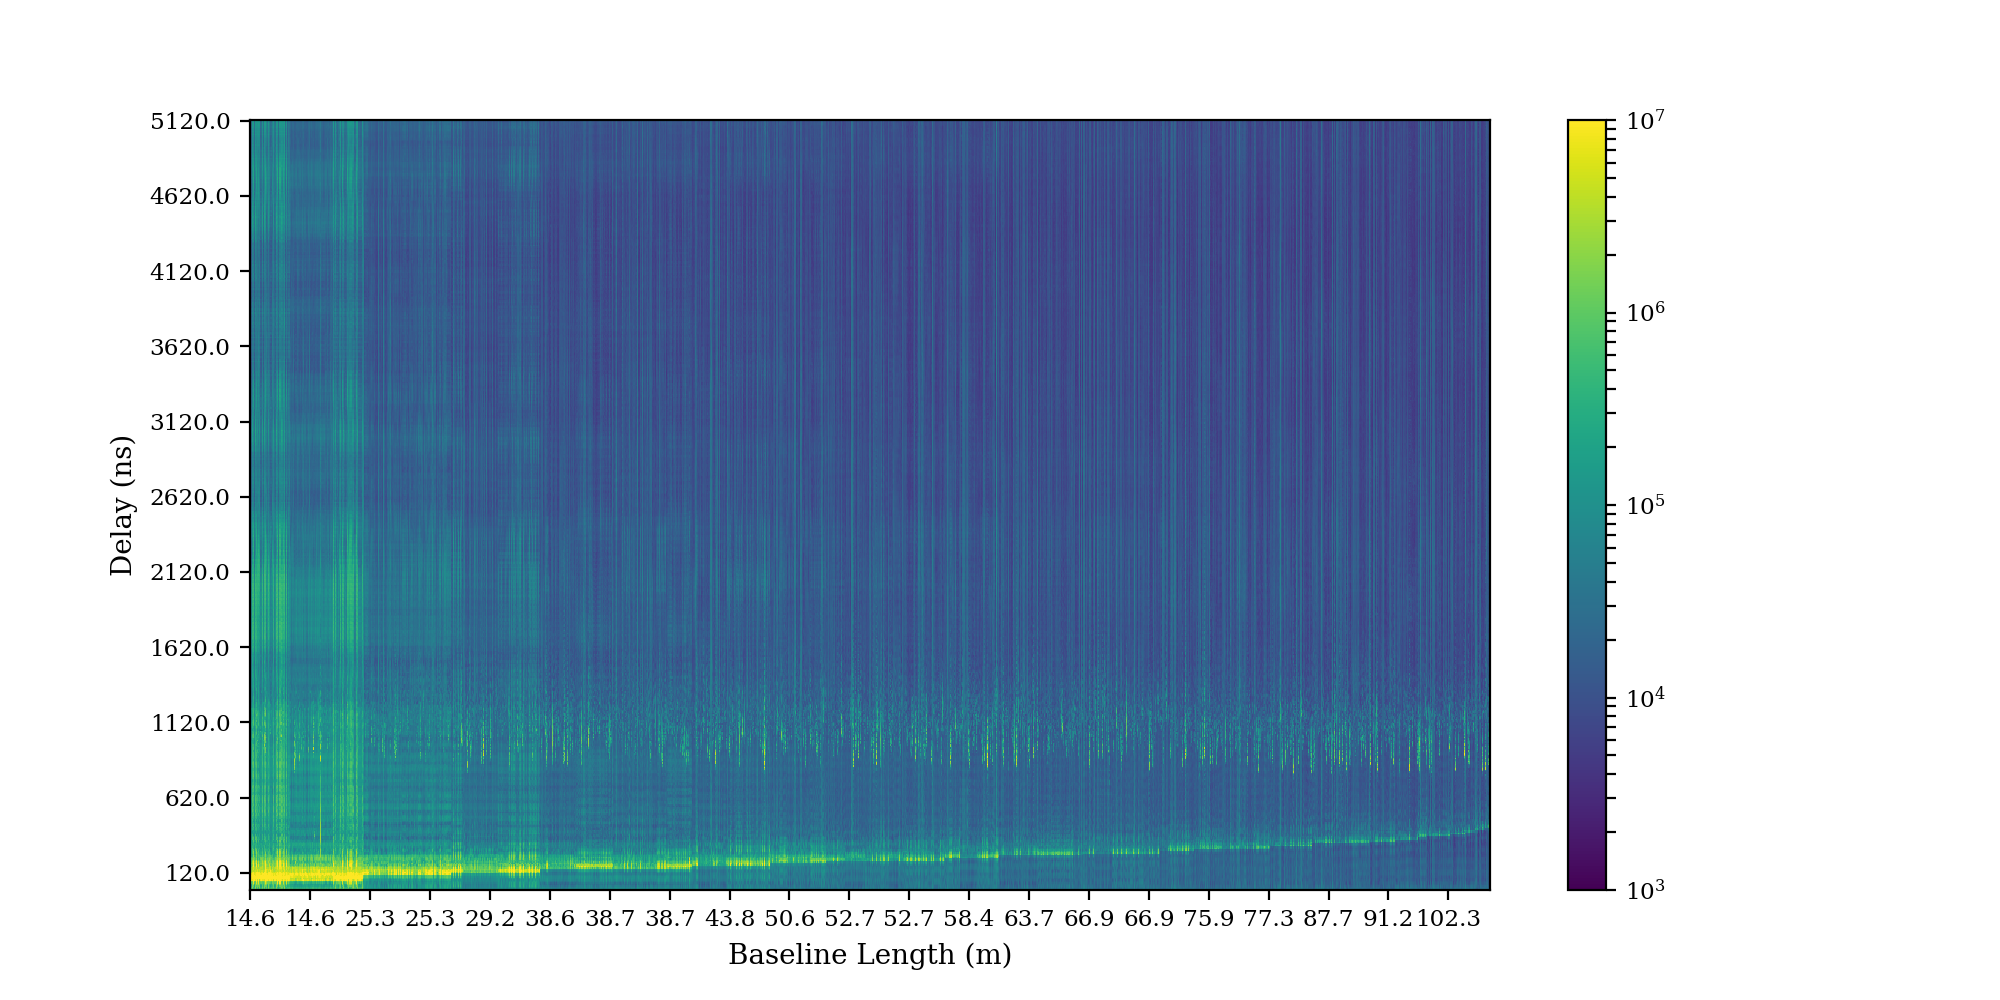

In [8]:
plt.figure(figsize=(10,5))
plt.imshow(wedge.T[:512,],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1))
plt.xticks(np.arange(0,baseline_len_round_nf.shape[0],100),baseline_len_round_nf[::100].round(1))
plt.xlabel('Baseline Length (m)')
plt.yticks(np.arange(0,delays[:512].shape[0],50),np.abs(delays)[:512][::50])
plt.ylabel('Delay (ns)')
plt.colorbar()

<IPython.core.display.Javascript object>


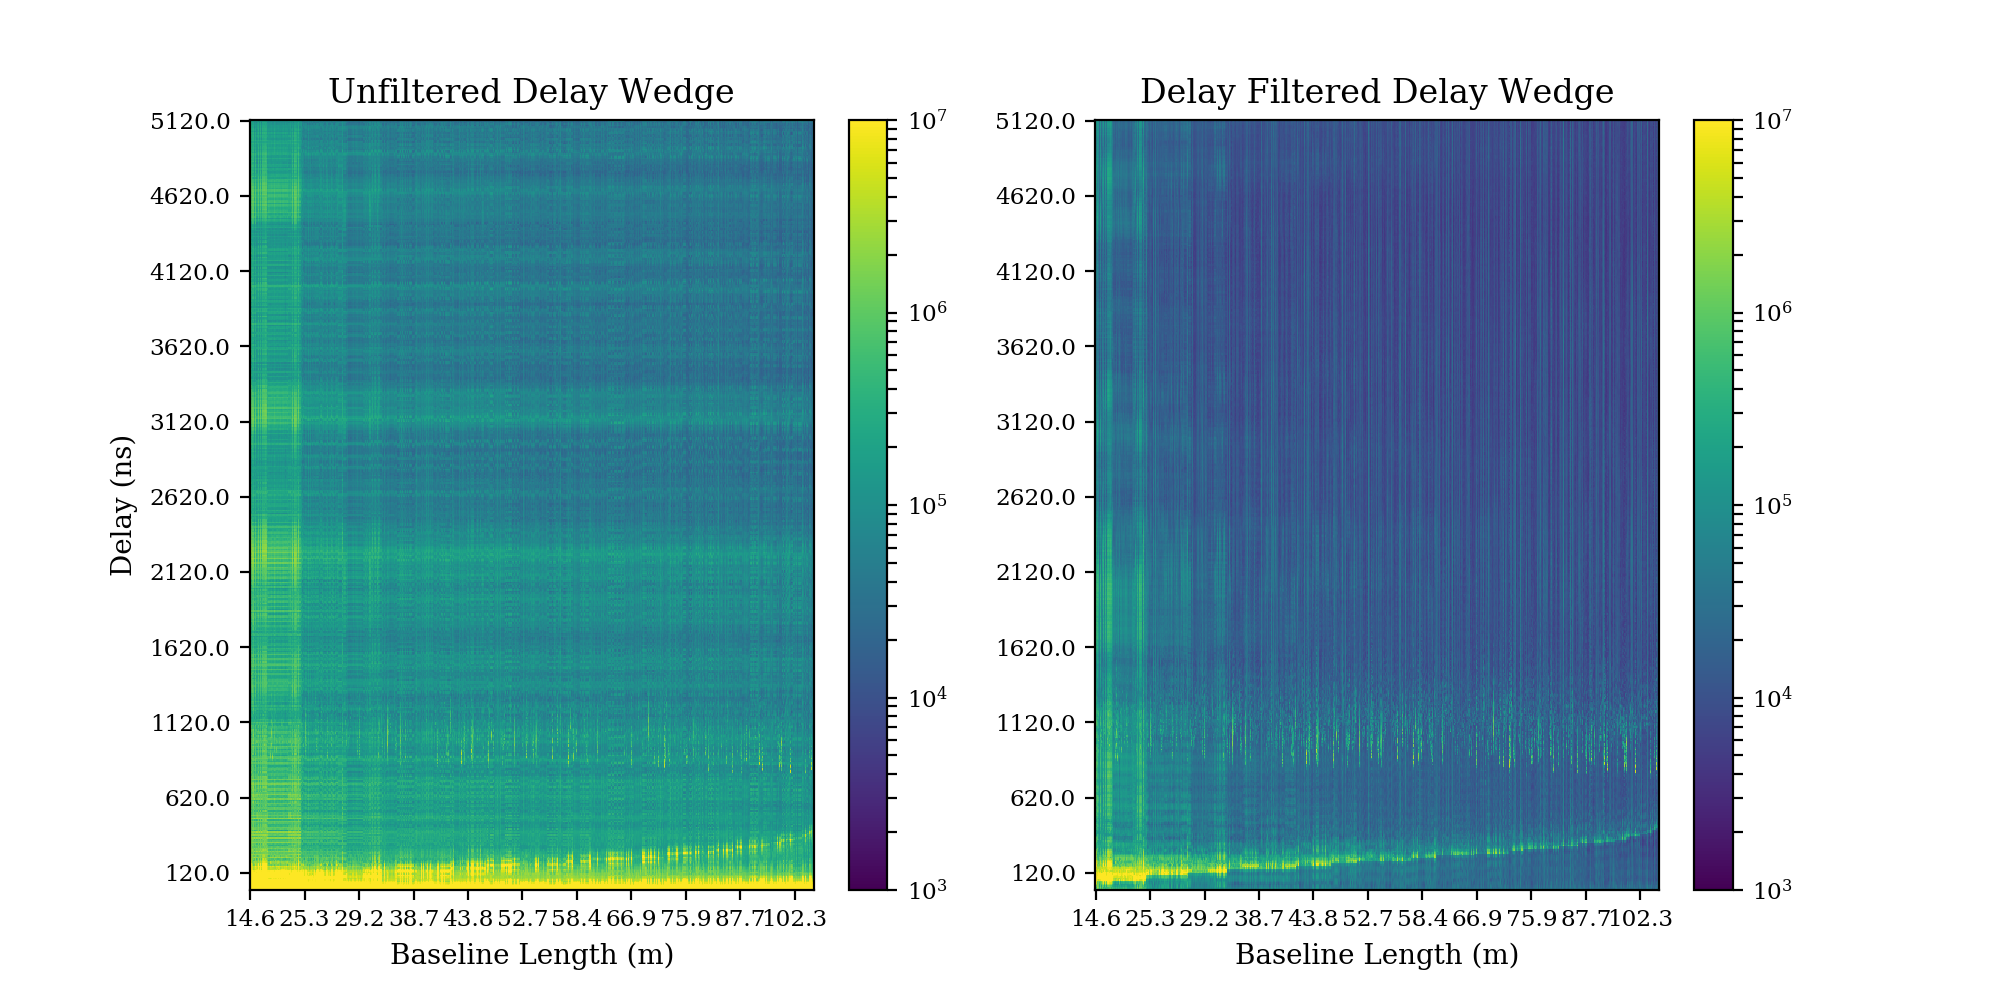

Text(0.5,1,'Delay Filtered Delay Wedge')

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(wedge_nf.T[:512,],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1))
plt.colorbar()
plt.xticks(np.arange(0,baseline_len_round_nf.shape[0],200),baseline_len_round_nf[::200].round(1))
plt.xlabel('Baseline Length (m)')
plt.title('Unfiltered Delay Wedge')
plt.yticks(np.arange(0,delays[:512].shape[0],50),np.abs(delays)[:512][::50])
plt.ylabel('Delay (ns)')

plt.subplot(1,2,2)
plt.imshow(wedge.T[:512,],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1))
plt.colorbar()
plt.xticks(np.arange(0,baseline_len_round_nf.shape[0],200),baseline_len_round_nf[::200].round(1))
plt.xlabel('Baseline Length (m)')
plt.yticks(np.arange(0,delays[:512].shape[0],50),np.abs(delays)[:512][::50])
plt.title('Delay Filtered Delay Wedge')

<IPython.core.display.Javascript object>


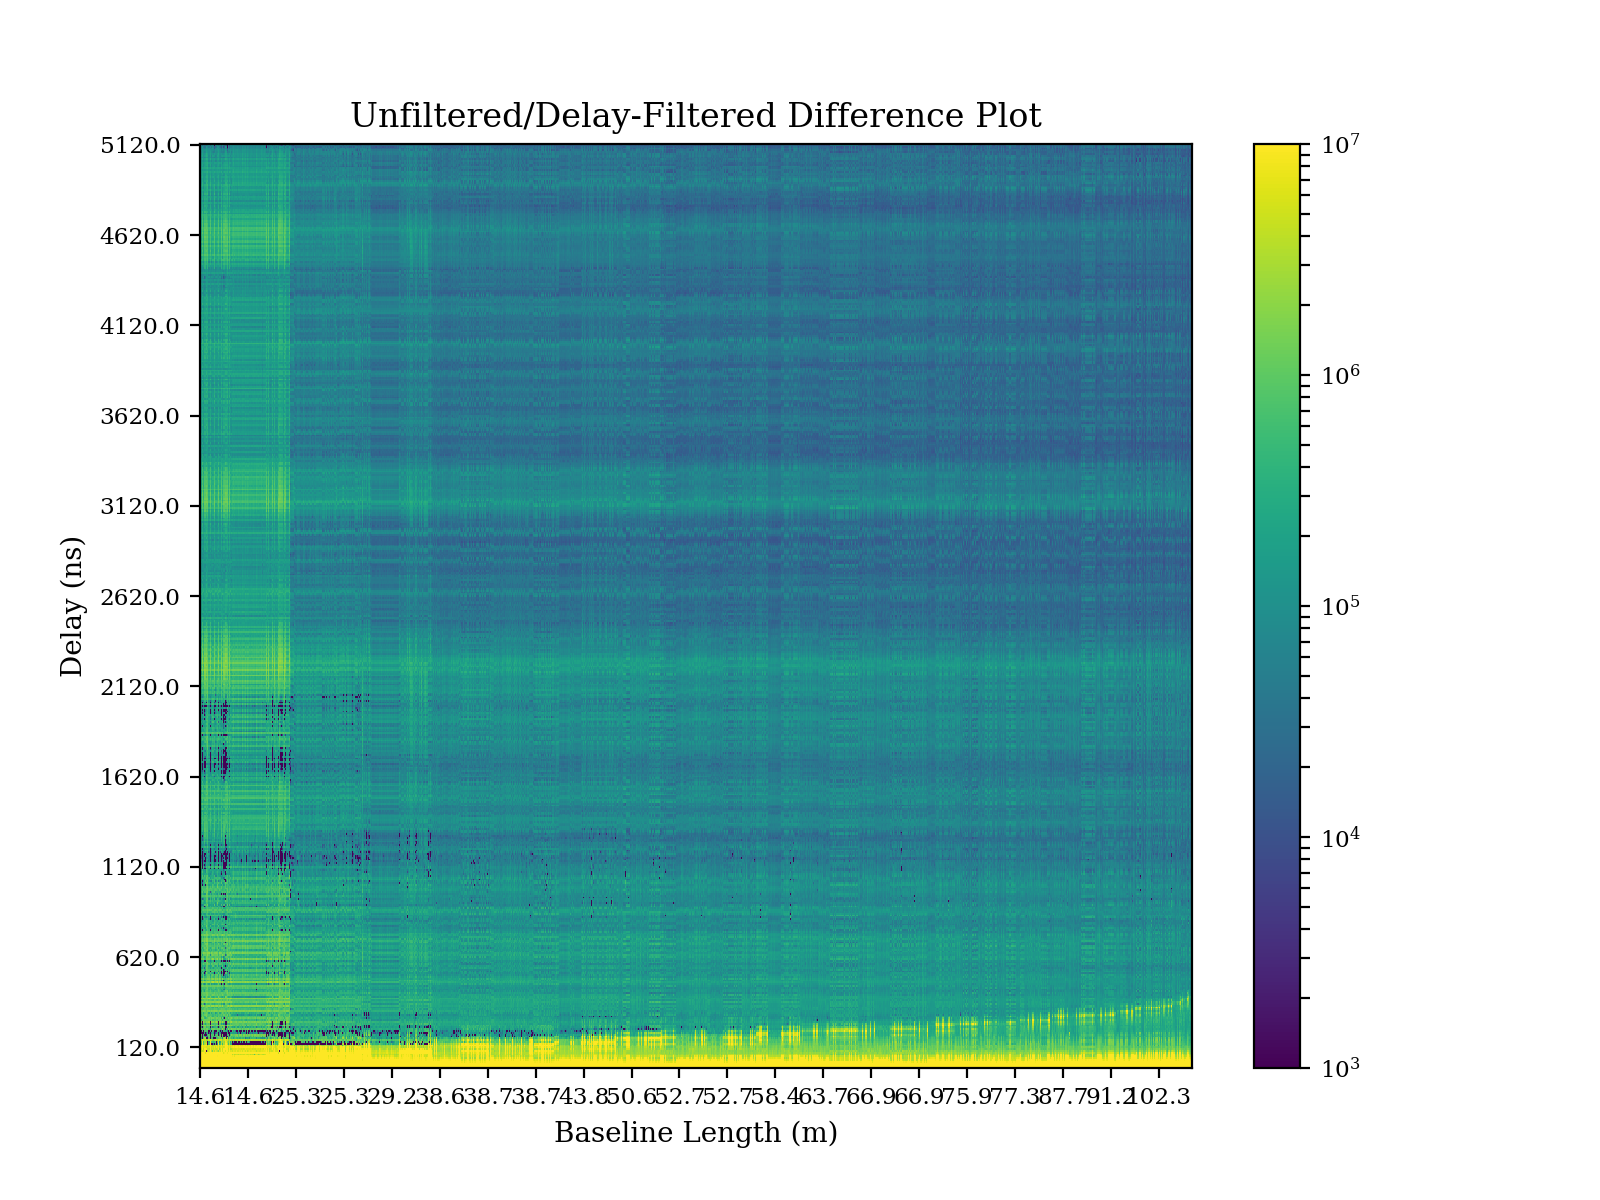

In [20]:
plt.figure(figsize=(8,6))
plt.imshow(wedge_nf.T[:512,]-wedge.T[:512,],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1))
plt.title('Unfiltered/Delay-Filtered Difference Plot')
plt.xticks(np.arange(0,baseline_len_round_nf.shape[0],100),baseline_len_round_nf[::100].round(1))
plt.xlabel('Baseline Length (m)')
plt.yticks(np.arange(0,delays[:512].shape[0],50),np.abs(delays)[:512][::50])
plt.ylabel('Delay (ns)')
plt.colorbar()

<IPython.core.display.Javascript object>


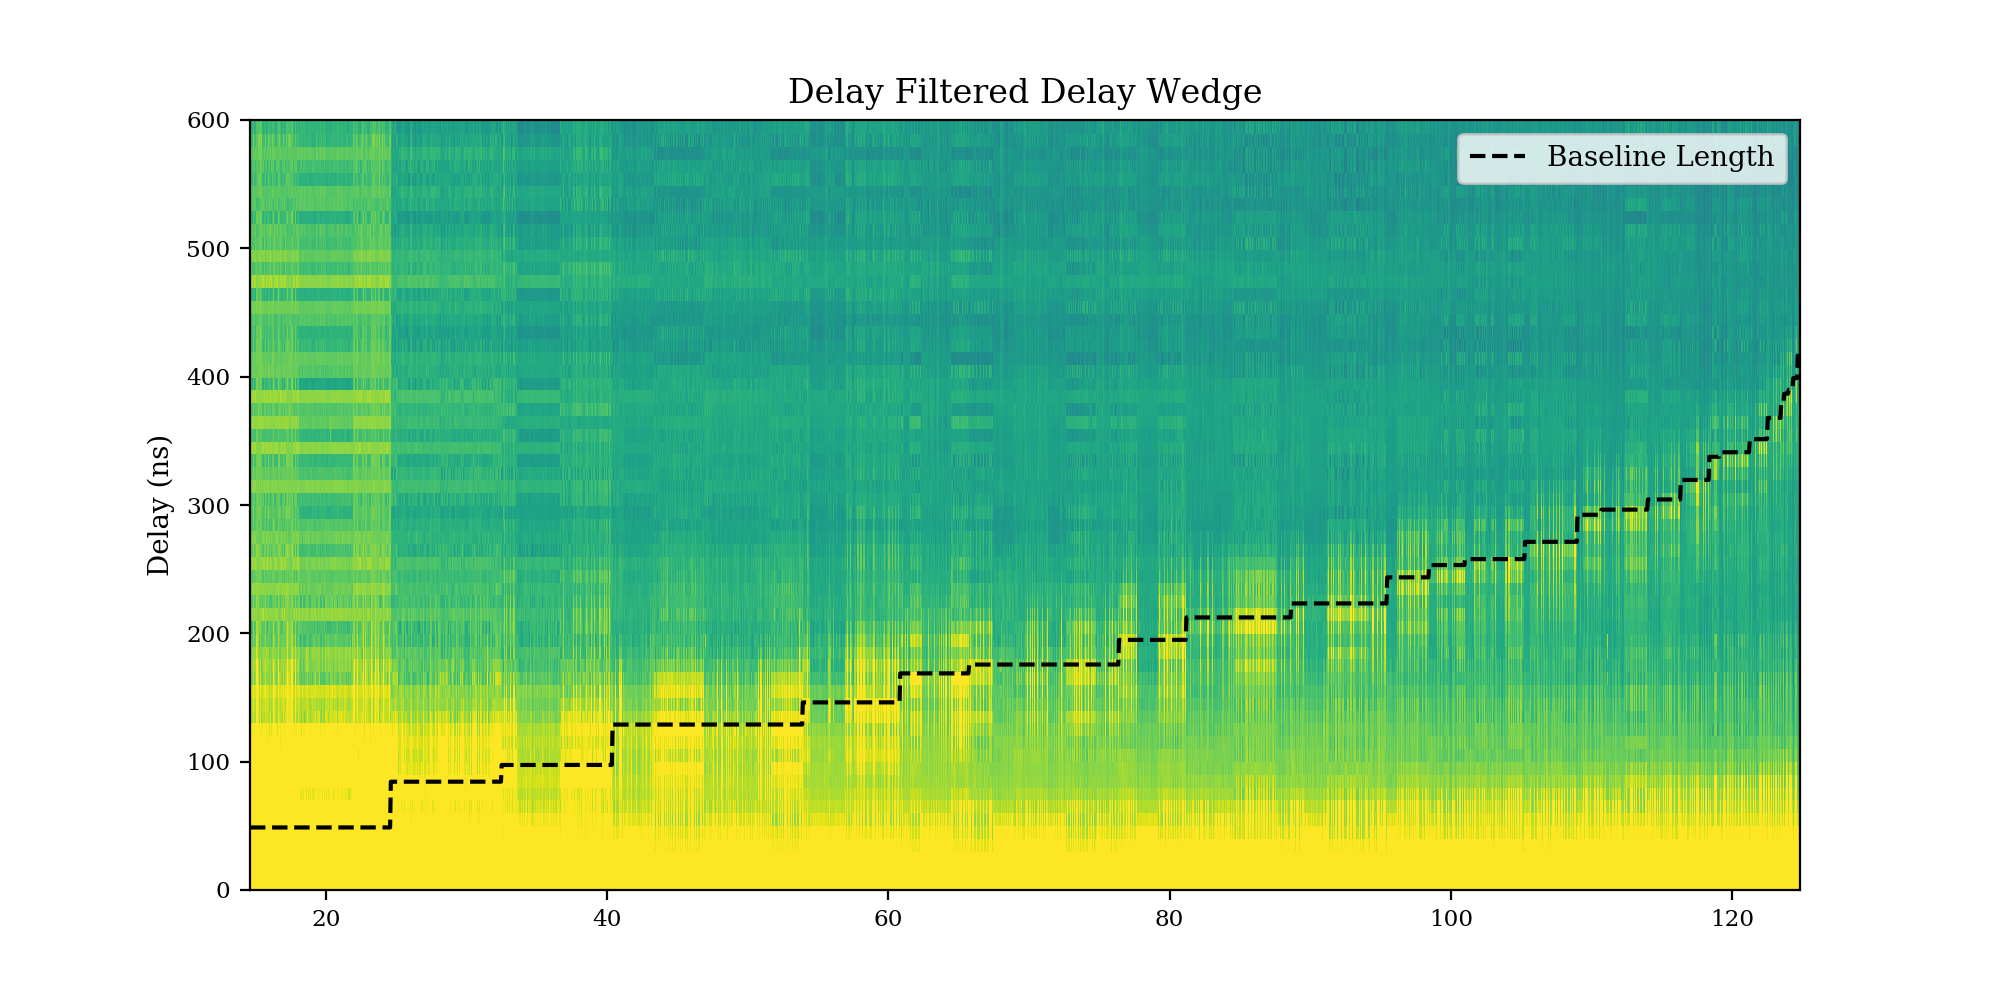

In [11]:
baseline_len_round_nf = baseline_arr[:2070]
baseline_len_round_nf.sort()

c = 2.998e8

x = baseline_len_round_nf
y = baseline_len_round_nf/c*1e9

figure = plt.figure(figsize=(10,5))
subplot = figure.add_subplot(111)
subplot.set_xlim(baseline_len_round_nf[0],baseline_len_round_nf[-1])
subplot.set_ylim(0,600)
subplot.imshow(wedge_nf.T[:512,],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1),extent=[baseline_len_round_nf[0], baseline_len_round_nf[-1], 0,delays[-1]])
#subplot.colorbar()
#subplot.xticks(np.arange(0,baseline_len_round_nf.shape[0],25),baseline_len_round_nf[::25].round(1))
#subplot.xlabel('Baseline Length (m)')
#subplot.title('Unfiltered Delay Wedge')
#subplot.yticks(np.arange(0,delays[:512].shape[0],50),np.abs(delays)[:512][::50])
#subplot.ylabel('Delay (ns)')
subplot.plot(np.linspace(min(x),max(x),y.shape[0]),y,'k--',label='Baseline Length')
plt.title('Delay Filtered Delay Wedge')
plt.ylabel('Delay (ns)')
plt.legend()

<IPython.core.display.Javascript object>


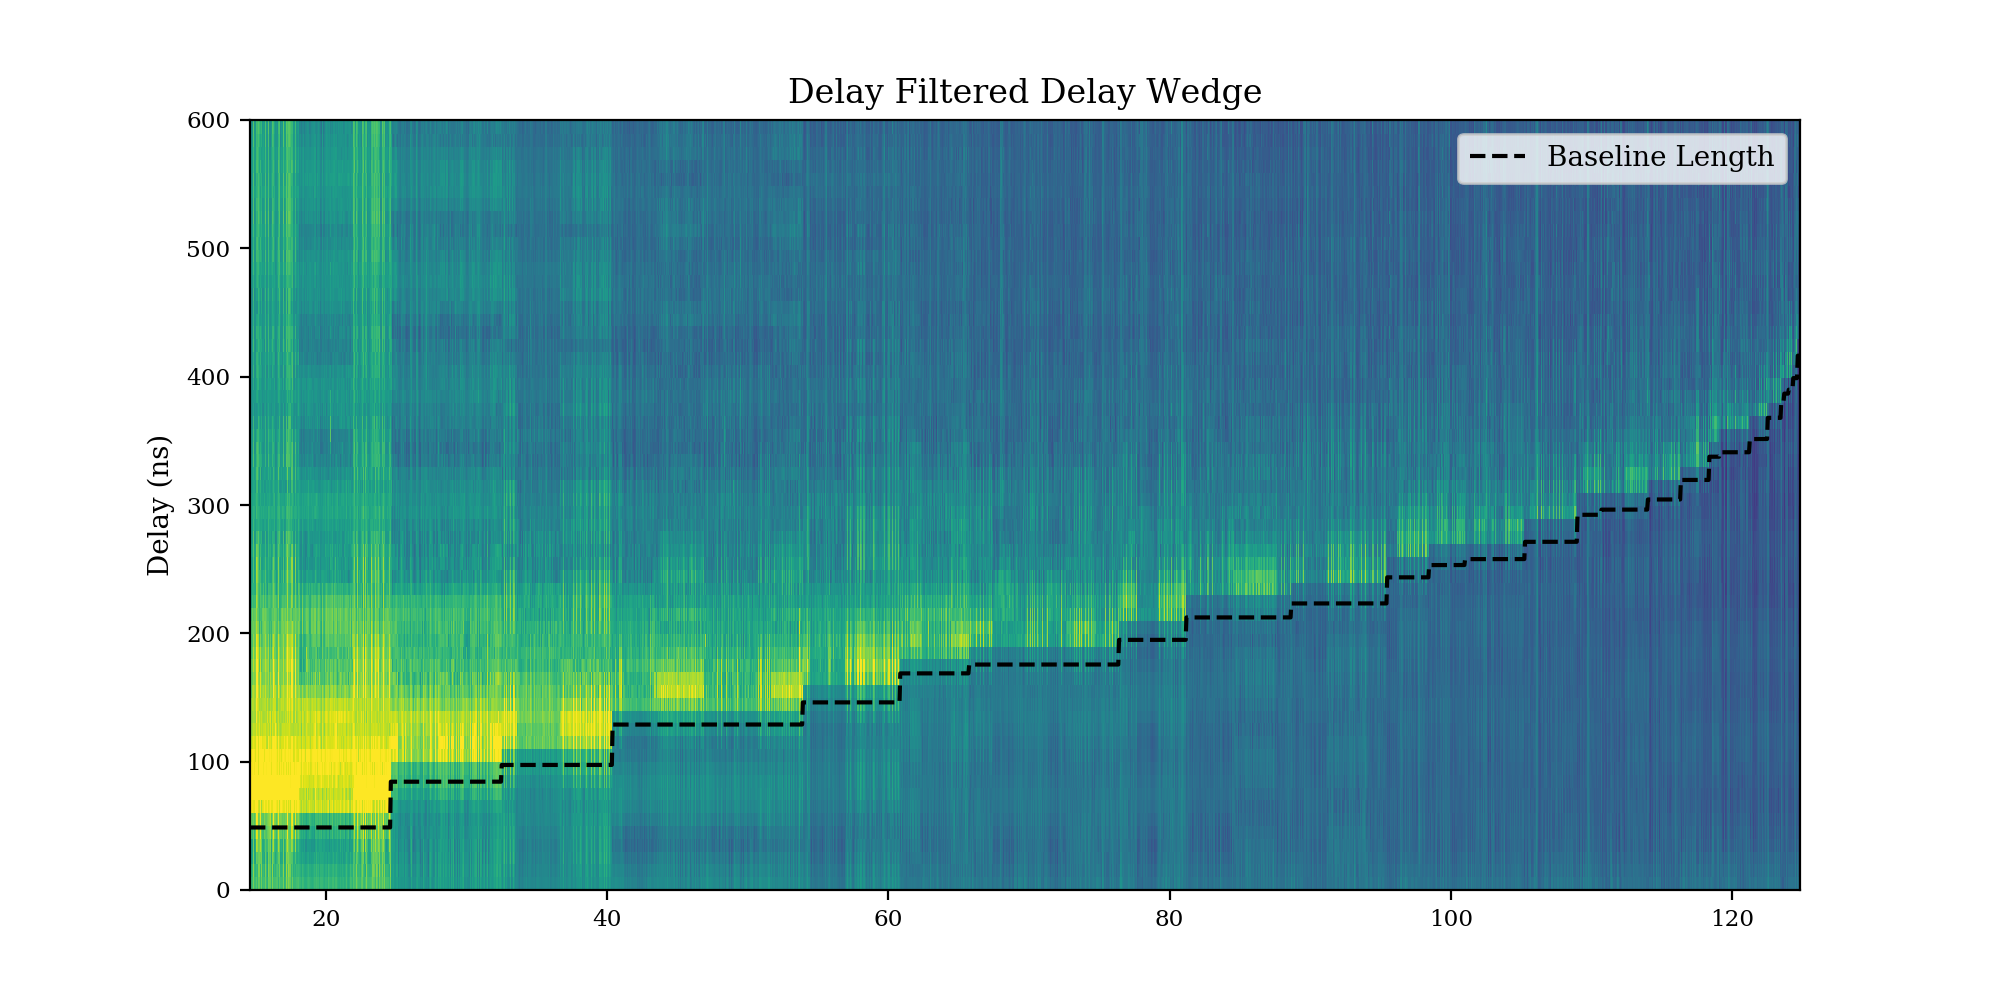

In [12]:
baseline_len_round_nf = baseline_arr[:2070]
baseline_len_round_nf.sort()

c = 2.998e8

x = baseline_len_round_nf
y = baseline_len_round_nf/c*1e9

figure = plt.figure(figsize=(10,5))
subplot = figure.add_subplot(111)
subplot.set_xlim(baseline_len_round_nf[0],baseline_len_round_nf[-1])
subplot.set_ylim(0,600)
subplot.imshow(wedge.T[:512,],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1),extent=[baseline_len_round_nf[0], baseline_len_round_nf[-1], 0,delays[-1]])
#subplot.colorbar()
#subplot.xticks(np.arange(0,baseline_len_round_nf.shape[0],25),baseline_len_round_nf[::25].round(1))
#subplot.xlabel('Baseline Length (m)')
#subplot.title('Unfiltered Delay Wedge')
#subplot.yticks(np.arange(0,delays[:512].shape[0],50),np.abs(delays)[:512][::50])
#subplot.ylabel('Delay (ns)')
subplot.plot(np.linspace(min(x),max(x),y.shape[0]),y,'k--',label='Baseline Length')
plt.title('Delay Filtered Delay Wedge')
plt.ylabel('Delay (ns)')
plt.legend()

<IPython.core.display.Javascript object>


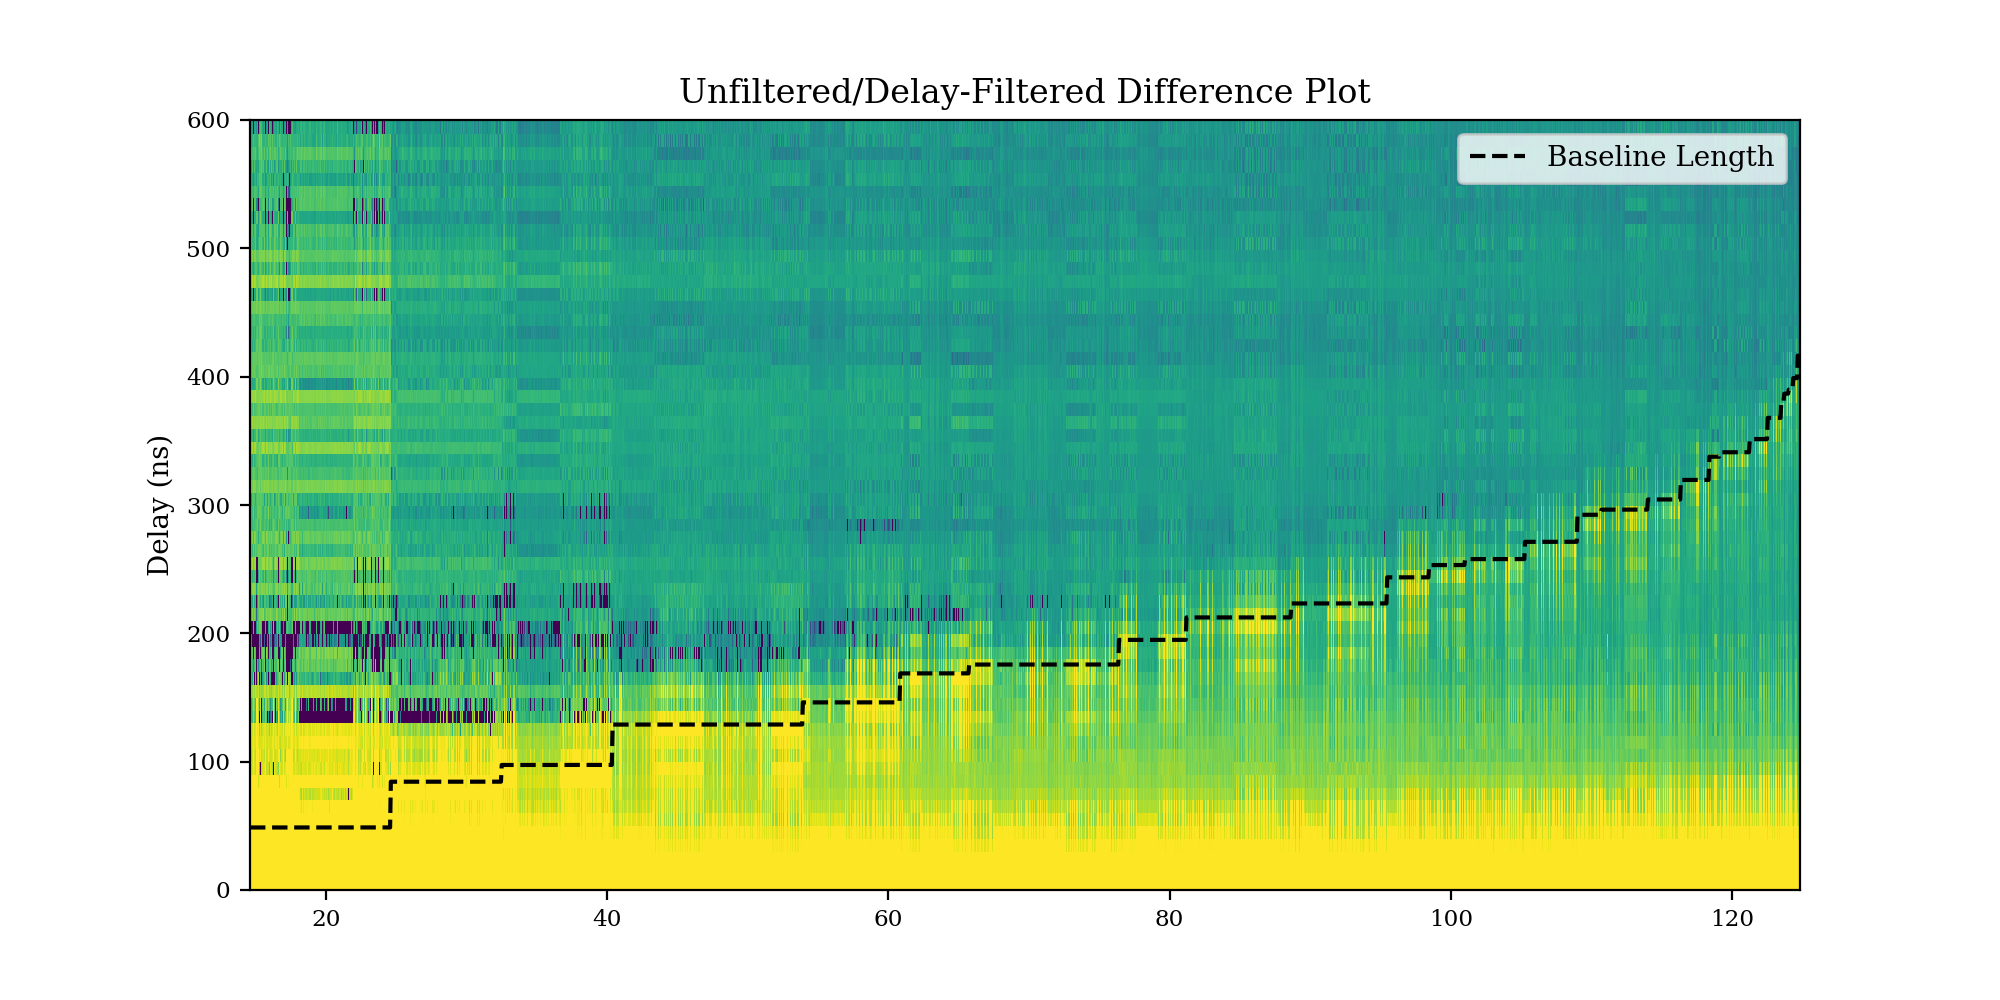

In [13]:
baseline_len_round_nf = baseline_arr[:2070]
baseline_len_round_nf.sort()

c = 2.998e8

x = baseline_len_round_nf
y = baseline_len_round_nf/c*1e9

figure = plt.figure(figsize=(10,5))
subplot = figure.add_subplot(111)
subplot.set_xlim(baseline_len_round_nf[0],baseline_len_round_nf[-1])
subplot.set_ylim(0,600)
subplot.imshow(wedge_nf.T[:512]-wedge.T[:512,],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1),extent=[baseline_len_round_nf[0], baseline_len_round_nf[-1], 0,delays[-1]])
#subplot.colorbar()
#subplot.xticks(np.arange(0,baseline_len_round_nf.shape[0],25),baseline_len_round_nf[::25].round(1))
#subplot.xlabel('Baseline Length (m)')
#subplot.title('Unfiltered Delay Wedge')
#subplot.yticks(np.arange(0,delays[:512].shape[0],50),np.abs(delays)[:512][::50])
#subplot.ylabel('Delay (ns)')
subplot.plot(np.linspace(min(x),max(x),y.shape[0]),y,'k--',label='Baseline Length')
plt.title('Unfiltered/Delay-Filtered Difference Plot')
plt.ylabel('Delay (ns)')
plt.legend()

In [14]:
baselines = np.unique(baseline_len_round_nf.round(0))
rounded_baselines = baseline_len_round_nf.round(0)

In [15]:
print np.unique(baseline_len_round_nf.round(0))
print np.unique(baseline_len_round_nf.round(1))

[ 15.  25.  29.  39.  44.  51.  53.  58.  64.  67.  73.  76.  77.  81.
  88.  89.  91.  96. 101. 102. 105. 110. 114. 116. 117. 120. 125.]
[ 14.6  25.3  29.2  38.6  38.7  43.8  50.6  52.7  58.4  63.7  66.9  73.
  75.9  77.3  81.3  87.6  87.7  88.9  91.2  95.8 101.2 102.3 105.3 105.4
 110.3 114.1 116.  116.9 119.6 124.8]


In [16]:
gridded_delay = np.zeros((120,1024))
gridded_delay_nf = np.zeros((120,1024))
for i in baselines:
    baseline_sum_nf = np.sum(wedge_nf[np.where(i == rounded_baselines)],axis=0)
    gridded_delay_nf[int(i-10),:] = baseline_sum_nf
    baseline_sum = np.sum(wedge[np.where(i == rounded_baselines)],axis=0)
    gridded_delay[int(i-10),:] = baseline_sum

<IPython.core.display.Javascript object>


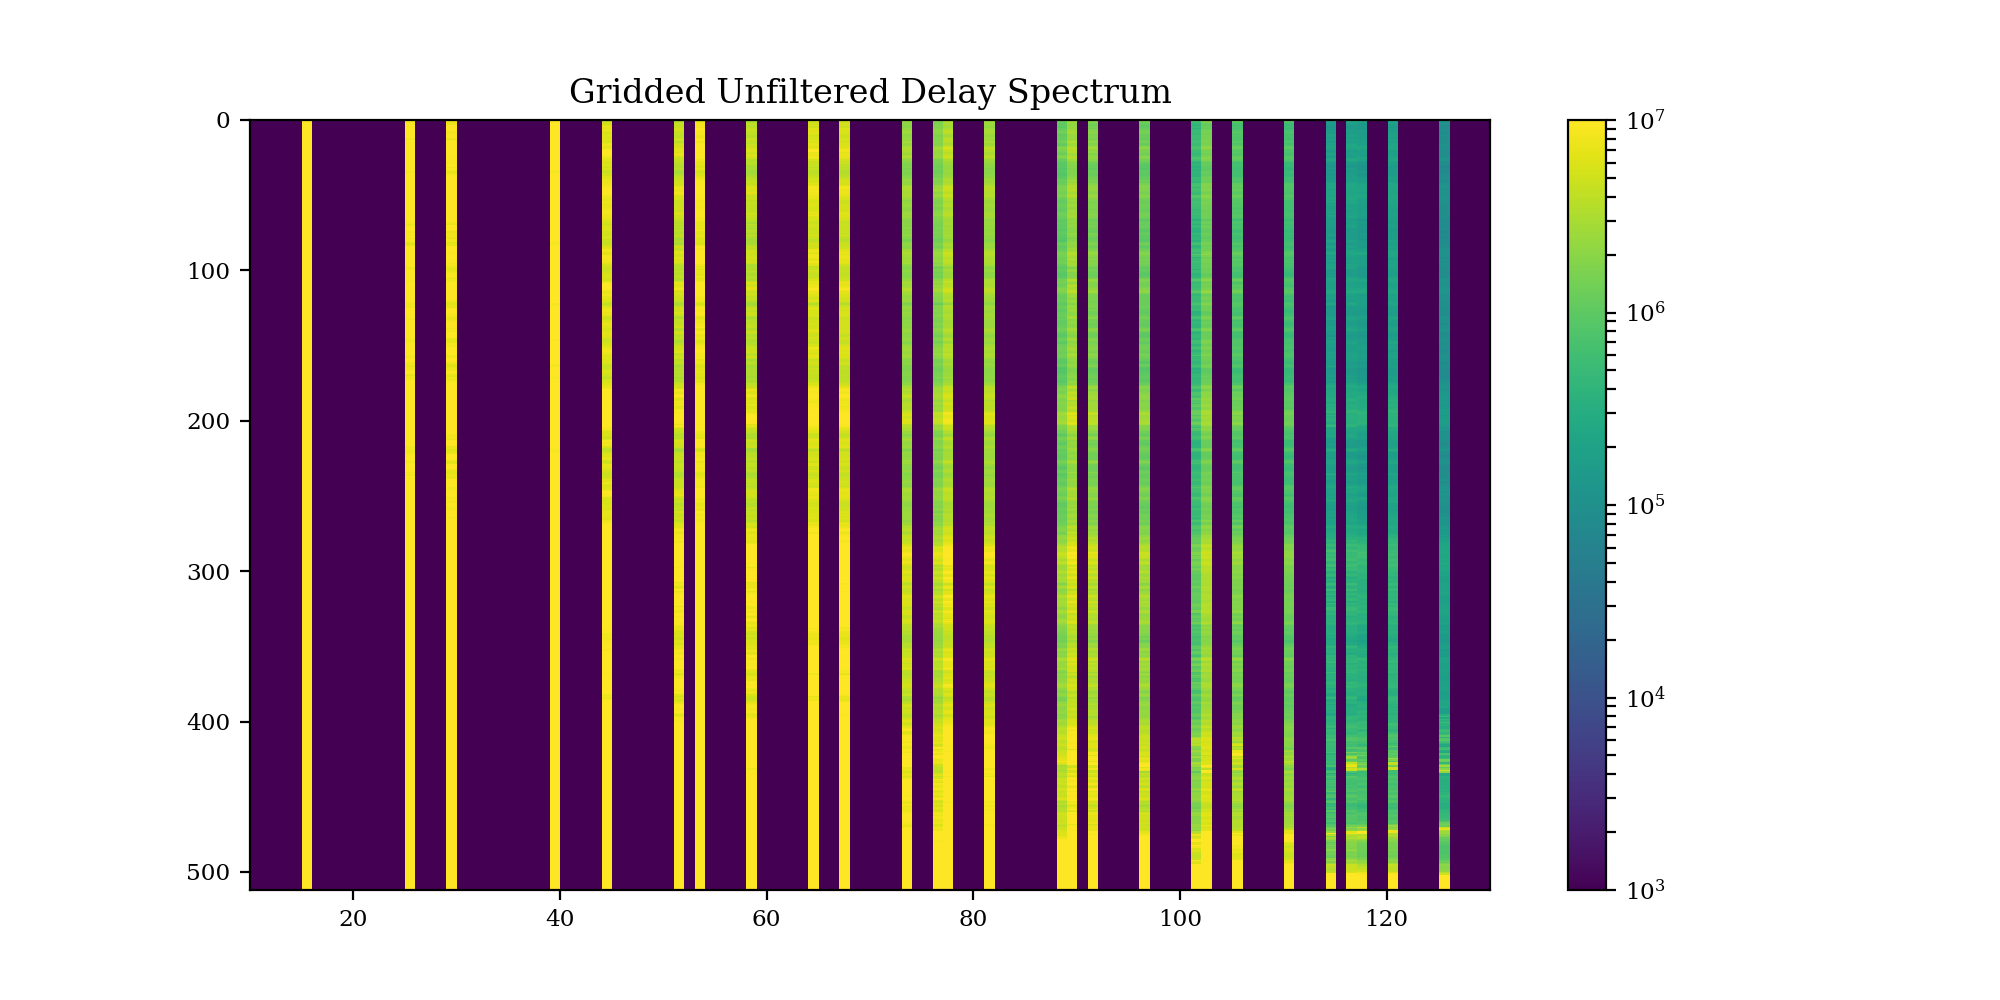

In [17]:
plt.figure(figsize=(10,5))
plt.imshow(gridded_delay_nf.T[:512],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1),extent=[10,130,512,0])
plt.title('Gridded Unfiltered Delay Spectrum')
plt.colorbar()

<IPython.core.display.Javascript object>


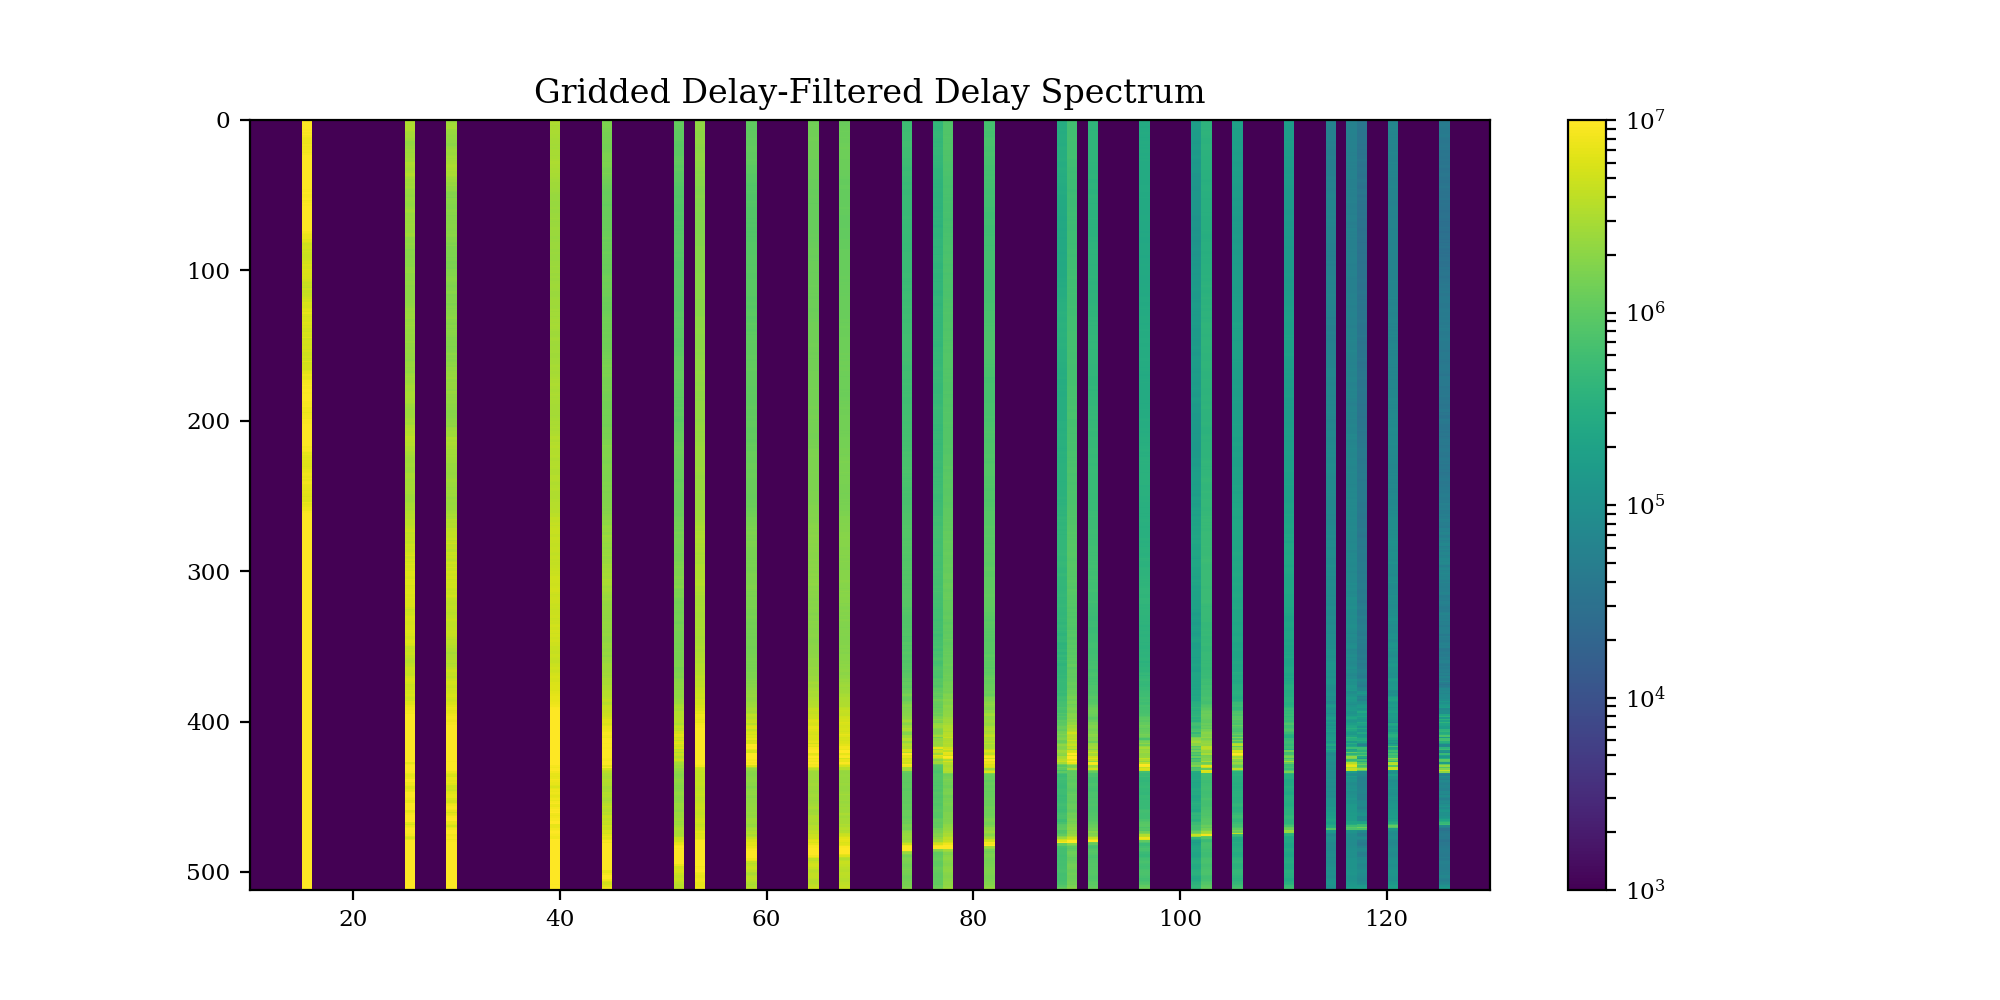

In [18]:
plt.figure(figsize=(10,5))
plt.imshow(gridded_delay.T[:512],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1),extent=[10,130,512,0])
plt.title('Gridded Delay-Filtered Delay Spectrum')
plt.colorbar()

<IPython.core.display.Javascript object>


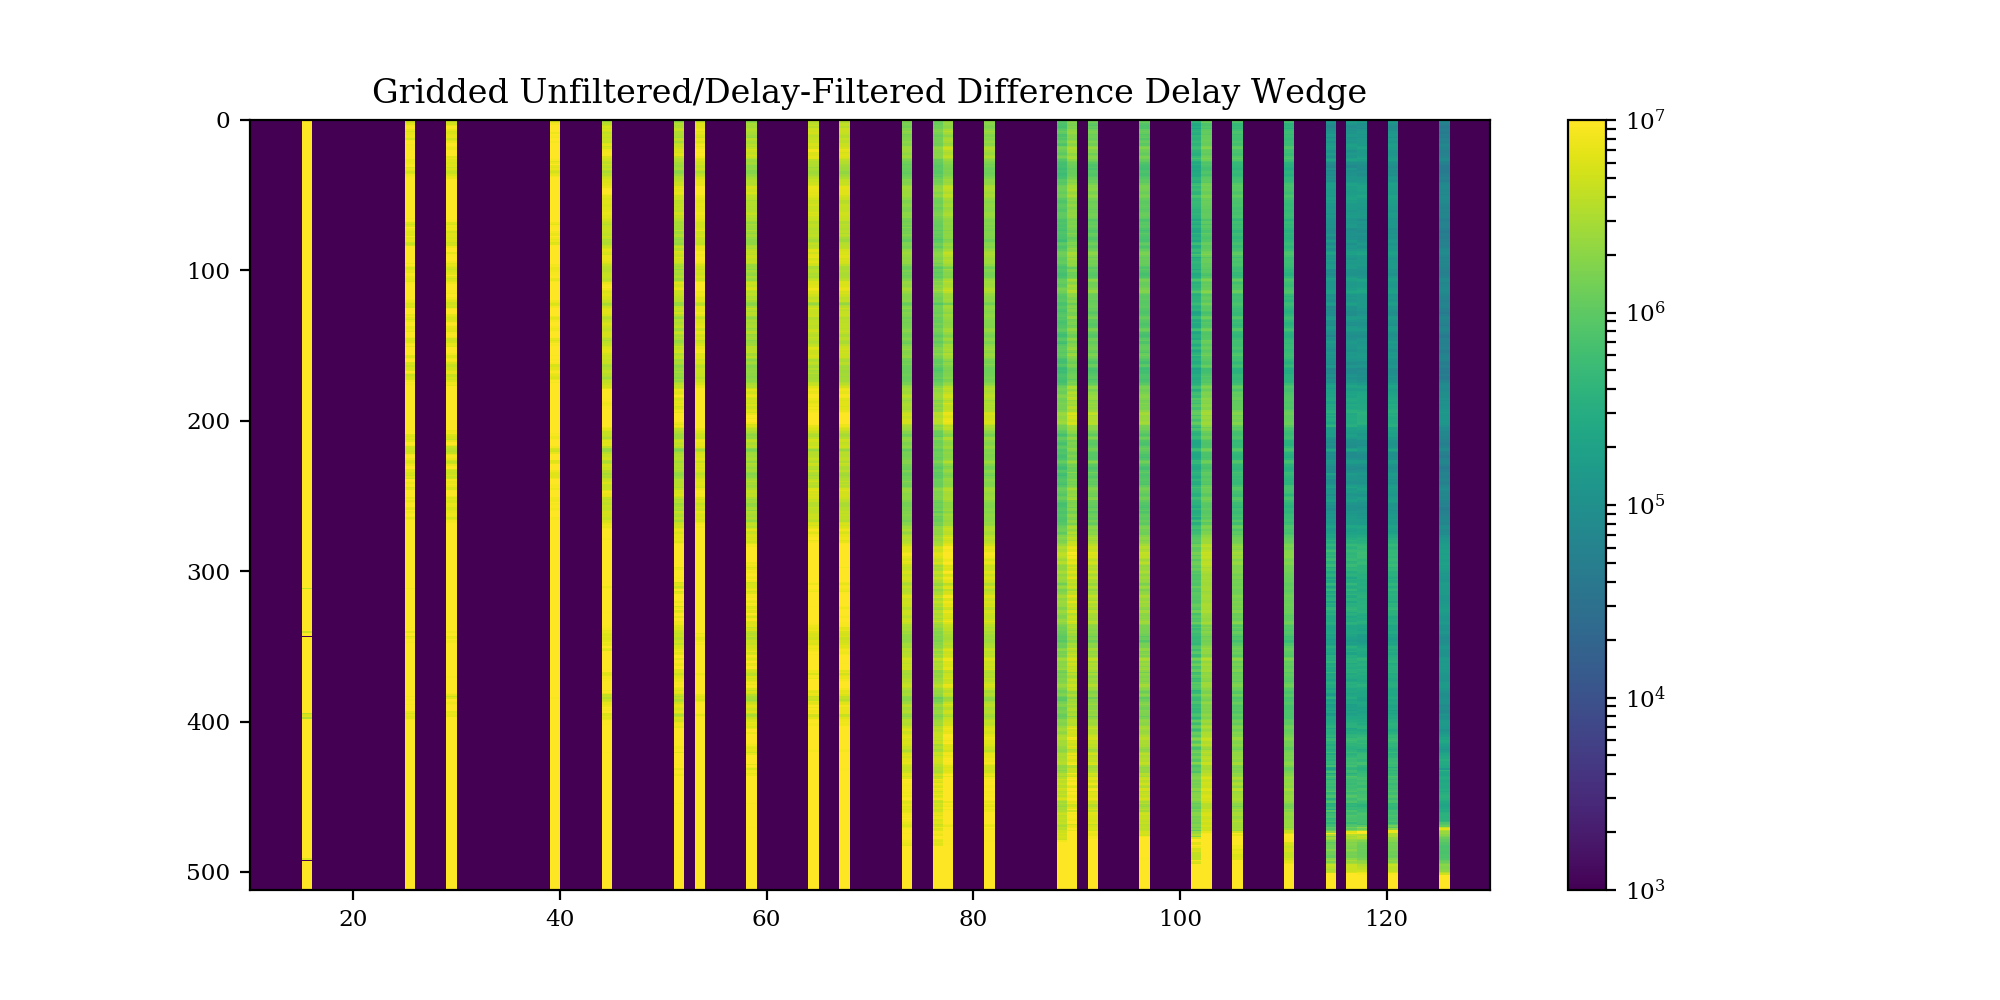

In [19]:
plt.figure(figsize=(10,5))
plt.imshow(gridded_delay_nf.T[:512]-gridded_delay.T[:512],aspect='auto',norm=SymLogNorm(vmin=1e3,vmax=1e7,linthresh=.1),extent=[10,130,512,0])
plt.title('Gridded Unfiltered/Delay-Filtered Difference Delay Wedge')
plt.colorbar()